TAREA N°1 ANÁLISIS DE DATOS

JUAN CRISTÓBAL VARAS TOMASELLO;
GEOLOGÍA UNIVERSIDAD DEL DESARROLLO;
12-10-2021

1. Mostrar y explicar, en 16 gráficos (uno por región), como fue la evolución de la cuarentena (por día)
2. Qué dia hubo la mayor cantidad de personas en cuarentena en cada región
3. Qué día hubo la mayor cantidad de personas en cuarentena en el país

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline
# importar bases de datos

In [2]:
df1 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true', sep=',')
# poblaciones por comuna, util para saber la cantidad de personas en cuarentena por fecha

In [3]:
df2 = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')
# paso a paso, muestra en que fases se encuentra cada comuna en cada fecha

In [4]:
pob=df1[['Region','Codigo region','Comuna','Codigo comuna','Poblacion']] 
pob=pob.dropna()
pob.head()
# de la tabla de covid19, solo nos interesan los campos region, codigo region, comuna, codigo comuna y POBLACION

,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15,Arica,15101.0,247552.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0
5,Tarapacá,1,Alto Hospicio,1107.0,129999.0


In [5]:
pob['Poblacion']=pob['Poblacion'].astype(int)
pob['Codigo comuna']=pob['Codigo comuna'].astype(int)
# tanto poblacion como codigo comuna son valores float, por lo que deben ser convertidos a integer

In [6]:
pasos=df2.melt(id_vars=["codigo_region","region_residencia","codigo_comuna","comuna_residencia","zona"], var_name="fecha", value_name="paso")
#pasos1=pasos[(pasos['paso']==1)] 
# lo anterior se habia realizado para solo considerar cuando paso=1, sin embargo, arrojaba un error en los graficos al considerar lineas rectas
# donde deberian haber valores 0 con comunas fuera de cuarentena
pasos1=pasos
# lo que se busca es que las fechas se ordenen por filas, y que solo se tengan en cuenta cuando hubo cuarentena (fase 1)

In [7]:
pasos1=pasos1.rename(columns={'codigo_comuna':'Codigo comuna'})
# el objetivo es cambiar el nombre del codigo para hacer link con otra tabla de datos

In [8]:
ppob=pob.merge(pasos1, on='Codigo comuna') 
ppobr=pob.merge(pasos1, on='Codigo comuna')
# union de las tablas

In [9]:
ppob

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,codigo_region,region_residencia,comuna_residencia,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Rural,2020-07-28,3
1,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-28,1
2,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Rural,2020-07-29,3
3,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-29,1
4,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Rural,2020-07-30,3
...,...,...,...,...,...,...,...,...,...,...,...
168291,Magallanes,12,Torres del Paine,12402,1021,12,Magallanes,Torres del Paine,Total,2021-10-02,4
168292,Magallanes,12,Torres del Paine,12402,1021,12,Magallanes,Torres del Paine,Total,2021-10-03,4
168293,Magallanes,12,Torres del Paine,12402,1021,12,Magallanes,Torres del Paine,Total,2021-10-04,4
168294,Magallanes,12,Torres del Paine,12402,1021,12,Magallanes,Torres del Paine,Total,2021-10-05,4


In [10]:
cambio2 = (ppob['paso'] == 2)
ppob['Poblacion'][cambio2] = 0
cambio3 = (ppob['paso'] == 3)
ppob['Poblacion'][cambio3] = 0
cambio4 = (ppob['paso'] == 4)
ppob['Poblacion'][cambio4] = 0
cambio5 = (ppob['paso'] == 5)
ppob['Poblacion'][cambio5] = 0
ppob 
# contabiliza los dias que existen entre fechas de pandemia, de otro modo al hacer el grafico,
# mostraria lineas rectas entre fechas con cuerentena y no tomaria en cuenta los valles sin cuarentena

<ipython-input-10-de04d5bdc55e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppob['Poblacion'][cambio2] = 0
<ipython-input-10-de04d5bdc55e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppob['Poblacion'][cambio3] = 0
<ipython-input-10-de04d5bdc55e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppob['Poblacion'][cambio4] = 0
<ipython-input-10-de04d5bdc55e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,codigo_region,region_residencia,comuna_residencia,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,0,15,Arica y Parinacota,Arica,Rural,2020-07-28,3
1,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-28,1
2,Arica y Parinacota,15,Arica,15101,0,15,Arica y Parinacota,Arica,Rural,2020-07-29,3
3,Arica y Parinacota,15,Arica,15101,247552,15,Arica y Parinacota,Arica,Urbana,2020-07-29,1
4,Arica y Parinacota,15,Arica,15101,0,15,Arica y Parinacota,Arica,Rural,2020-07-30,3
...,...,...,...,...,...,...,...,...,...,...,...
168291,Magallanes,12,Torres del Paine,12402,0,12,Magallanes,Torres del Paine,Total,2021-10-02,4
168292,Magallanes,12,Torres del Paine,12402,0,12,Magallanes,Torres del Paine,Total,2021-10-03,4
168293,Magallanes,12,Torres del Paine,12402,0,12,Magallanes,Torres del Paine,Total,2021-10-04,4
168294,Magallanes,12,Torres del Paine,12402,0,12,Magallanes,Torres del Paine,Total,2021-10-05,4


In [11]:
cambior2 = (ppobr['paso'] == 2)
ppobr['Poblacion'][cambior2] = 0
cambior3 = (ppobr['paso'] == 3)
ppobr['Poblacion'][cambior3] = 0
cambior4 = (ppobr['paso'] == 4)
ppobr['Poblacion'][cambior4] = 0
cambior5 = (ppobr['paso'] == 5)
ppobr['Poblacion'][cambior5] = 0
# toma valores de poblacion 0 cuando las fases sean distintas a cuarentena

<ipython-input-11-5bb4a6b9d0ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppobr['Poblacion'][cambior2] = 0
<ipython-input-11-5bb4a6b9d0ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppobr['Poblacion'][cambior3] = 0
<ipython-input-11-5bb4a6b9d0ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ppobr['Poblacion'][cambior4] = 0
<ipython-input-11-5bb4a6b9d0ab>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [12]:
ppob=ppob.sort_values(by='fecha', ascending=True)  
ppob
# orden de las fechas de mas antigua a mas actual

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,codigo_region,region_residencia,comuna_residencia,zona,fecha,paso
0,Arica y Parinacota,15,Arica,15101,0,15,Arica y Parinacota,Arica,Rural,2020-07-28,3
118592,Araucanía,9,Curacautin,9203,0,9,La Araucanía,Curacautín,Rural,2020-07-28,4
118156,Araucanía,9,Cunco,9103,0,9,La Araucanía,Cunco,Total,2020-07-28,4
117720,Araucanía,9,Collipulli,9202,0,9,La Araucanía,Collipulli,Total,2020-07-28,4
6540,Antofagasta,2,Calama,2201,190336,2,Antofagasta,Calama,Total,2020-07-28,1
...,...,...,...,...,...,...,...,...,...,...,...
113795,Biobío,8,Santa Barbara,8311,0,8,Biobío,Santa Bárbara,Total,2021-10-06,4
114231,Biobío,8,Santa Juana,8109,0,8,Biobío,Santa Juana,Total,2021-10-06,4
114667,Biobío,8,Talcahuano,8110,0,8,Biobío,Talcahuano,Total,2021-10-06,4
83711,Maule,7,Parral,7404,0,7,Maule,Parral,Total,2021-10-06,3


In [13]:
# Como se desconoce como se distribuye la poblacion en las distintas regiones del pais (fechas donde se toma el area rural y/o urbana y/o total),
# se estima que las fechas donde aparece rural y urbana la poblacion se duplicara.

In [14]:
ppob.drop('paso', axis=1, inplace=True)
ppob.drop('Comuna', axis=1, inplace=True)
ppob.drop('Codigo comuna', axis=1, inplace=True)
ppob.drop('codigo_region', axis=1, inplace=True)
ppob.drop('Codigo region', axis=1, inplace=True)
# lo que se pretende es que el programa sume las poblaciones por comuna cuando estan en cuarentena, no que sume los otros parametros

In [15]:
ppobr.drop('paso', axis=1, inplace=True)
ppobr.drop('Comuna', axis=1, inplace=True)
ppobr.drop('Codigo comuna', axis=1, inplace=True)
ppobr.drop('Region', axis=1, inplace=True)
ppobr.drop('Codigo region', axis=1, inplace=True)
ppobr.drop('zona', axis=1, inplace=True)
ppobr.drop('comuna_residencia', axis=1, inplace=True)
ppobr.drop('region_residencia', axis=1, inplace=True)

In [16]:
t=ppob.groupby(['fecha']).sum() 
t
# total de poblacion en cuarentena para cada fecha a nivel pais

,Poblacion
fecha,
2020-07-28,9833441
2020-07-29,10609230
2020-07-30,10609230
2020-07-31,10609230
2020-08-01,10609230
...,...
2021-10-02,0
2021-10-03,0
2021-10-04,0


<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

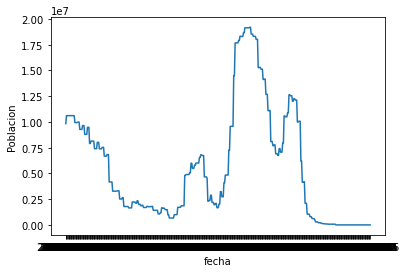

In [17]:
sbn.lineplot(x='fecha', y='Poblacion', data=t)

In [18]:
t.loc[t['Poblacion'] == t.max()[0]]
# con la funcion loc obtengo las fechas donde el numero de personas en cuarentena en todo el pais alcanzo su valor maximo,
# el que fue de 19.191.466 personas en las fechas 17 y 18 Abril del año 2021.

,Poblacion
fecha,
2021-04-17,19191466
2021-04-18,19191466


In [19]:
ppobr1=ppobr[(ppobr['codigo_region']==1)]
ppobr2=ppobr[(ppobr['codigo_region']==2)]
ppobr3=ppobr[(ppobr['codigo_region']==3)]
ppobr4=ppobr[(ppobr['codigo_region']==4)]
ppobr5=ppobr[(ppobr['codigo_region']==5)]
ppobr6=ppobr[(ppobr['codigo_region']==6)]
ppobr7=ppobr[(ppobr['codigo_region']==7)]
ppobr8=ppobr[(ppobr['codigo_region']==8)]
ppobr9=ppobr[(ppobr['codigo_region']==9)]
ppobr10=ppobr[(ppobr['codigo_region']==10)]
ppobr11=ppobr[(ppobr['codigo_region']==11)]
ppobr12=ppobr[(ppobr['codigo_region']==12)]
ppobr13=ppobr[(ppobr['codigo_region']==13)]
ppobr14=ppobr[(ppobr['codigo_region']==14)]
ppobr15=ppobr[(ppobr['codigo_region']==15)]
ppobr16=ppobr[(ppobr['codigo_region']==16)]
# poblacion y fechas separadas por region

In [20]:
ppobr1.drop('codigo_region', axis=1, inplace=True)
ppobr2.drop('codigo_region', axis=1, inplace=True)
ppobr3.drop('codigo_region', axis=1, inplace=True)
ppobr4.drop('codigo_region', axis=1, inplace=True)
ppobr5.drop('codigo_region', axis=1, inplace=True)
ppobr6.drop('codigo_region', axis=1, inplace=True)
ppobr7.drop('codigo_region', axis=1, inplace=True)
ppobr8.drop('codigo_region', axis=1, inplace=True)
ppobr9.drop('codigo_region', axis=1, inplace=True)
ppobr10.drop('codigo_region', axis=1, inplace=True)
ppobr11.drop('codigo_region', axis=1, inplace=True)
ppobr12.drop('codigo_region', axis=1, inplace=True)
ppobr13.drop('codigo_region', axis=1, inplace=True)
ppobr14.drop('codigo_region', axis=1, inplace=True)
ppobr15.drop('codigo_region', axis=1, inplace=True)
ppobr16.drop('codigo_region', axis=1, inplace=True)

C:\Users\juanc\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

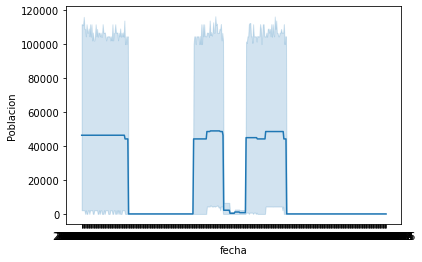

In [21]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr1)
# region 1: tarapaca

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

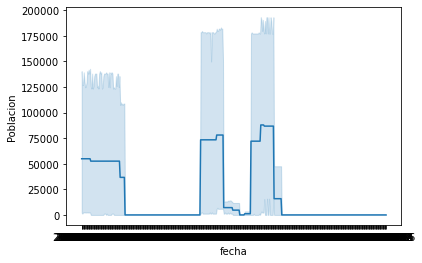

In [22]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr2)
# region 2: antofagasta

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

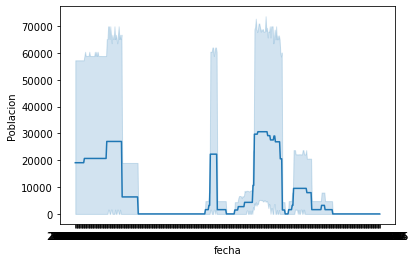

In [23]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr3)
# region 3: atacama

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

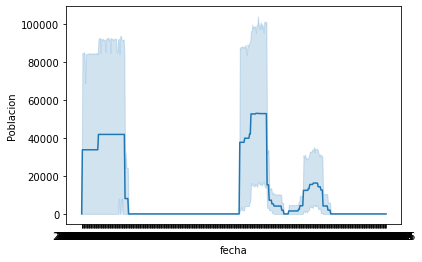

In [24]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr4)
# region 4: coquimbo

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

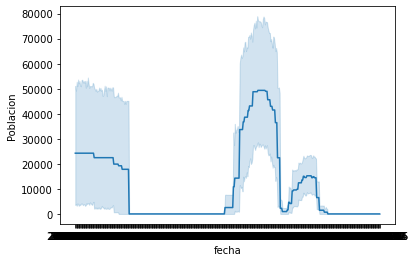

In [25]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr5)
# region 5: valparaiso 

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

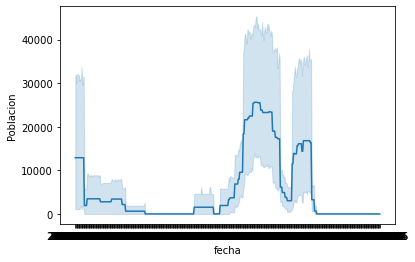

In [26]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr6)
# region 6: ohiggins

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

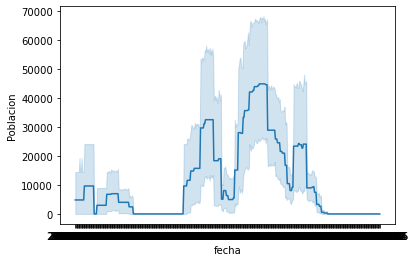

In [27]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr7)
# region 7: el maule

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

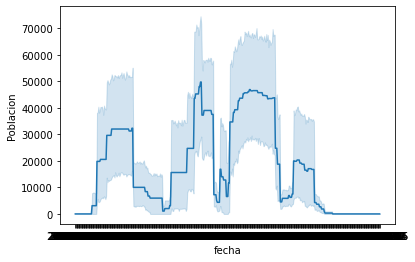

In [28]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr8)
# region 8: el bio bio

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

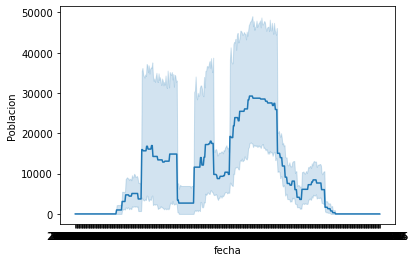

In [29]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr9)
# region 9: la araucania

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

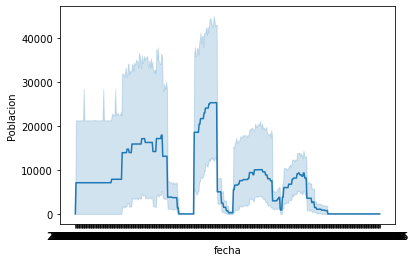

In [30]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr10)
 # region 10: los lagos

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

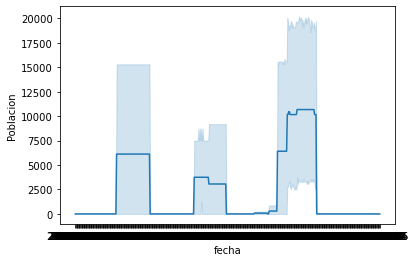

In [31]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr11)
# region 11: aysen

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

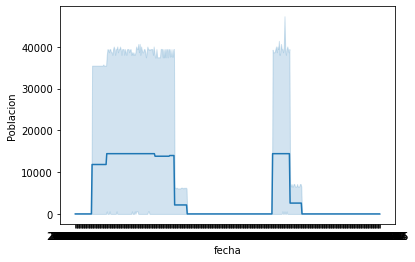

In [32]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr12)
#region 12: magallanes y antartica chilena

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

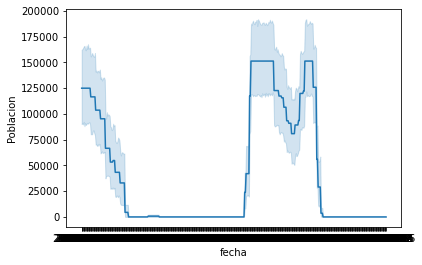

In [33]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr13)
# region 13: metropolitana de santiago

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

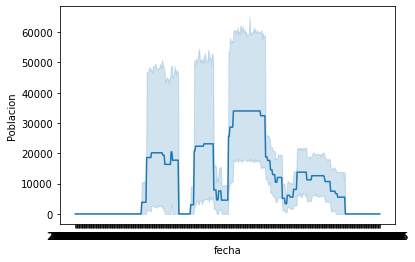

In [34]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr14)
# region 14: los rios

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

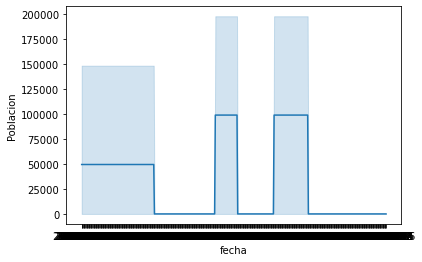

In [35]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr15)
# region 15: arica y parinacota

<AxesSubplot:xlabel='fecha', ylabel='Poblacion'>

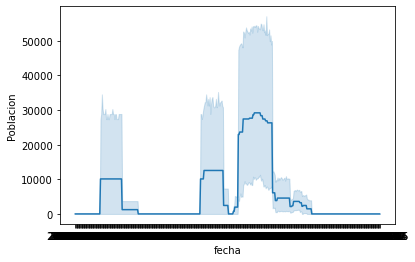

In [36]:
sbn.lineplot(x='fecha', y='Poblacion', data=ppobr16)
# region 16: ñuble

In [39]:
r1=ppobr1.groupby(['fecha']).sum()
r2=ppobr2.groupby(['fecha']).sum() 
r3=ppobr3.groupby(['fecha']).sum() 
r4=ppobr4.groupby(['fecha']).sum() 
r5=ppobr5.groupby(['fecha']).sum() 
r6=ppobr6.groupby(['fecha']).sum() 
r7=ppobr7.groupby(['fecha']).sum() 
r8=ppobr8.groupby(['fecha']).sum() 
r9=ppobr9.groupby(['fecha']).sum() 
r10=ppobr10.groupby(['fecha']).sum() 
r11=ppobr11.groupby(['fecha']).sum() 
r12=ppobr12.groupby(['fecha']).sum() 
r13=ppobr13.groupby(['fecha']).sum() 
r14=ppobr14.groupby(['fecha']).sum() 
r15=ppobr15.groupby(['fecha']).sum() 
r16=ppobr16.groupby(['fecha']).sum()

In [40]:
# Ahora, resta obtener todos los dias donde la region tuvo el maximo valor de personas en cuarentena para cada region, de modo
# de hallar la poblacion maxima por fecha y region.

In [41]:
r1.loc[r1['Poblacion'] == r1.max()[0]]
# R1 tarapaca

,Poblacion
fecha,
2021-01-28,391252
2021-01-29,391252
2021-01-30,391252
2021-01-31,391252
2021-02-01,391252
2021-02-02,391252
2021-02-03,391252
2021-02-04,391252
2021-02-05,391252


In [42]:
r2.loc[r2['Poblacion'] == r2.max()[0]]
# R2 antofagasta

,Poblacion
fecha,
2021-04-10,1055443
2021-04-11,1055443
2021-04-12,1055443
2021-04-13,1055443
2021-04-14,1055443


In [43]:
r3.loc[r3['Poblacion'] == r3.max()[0]]
# R3 atacama

,Poblacion
fecha,
2021-04-15,275723
2021-04-16,275723
2021-04-17,275723
2021-04-18,275723
2021-04-19,275723
2021-04-20,275723
2021-04-21,275723
2021-04-22,275723
2021-04-23,275723


In [44]:
r4.loc[r4['Poblacion'] == r4.max()[0]]
# R4 coquimbo

,Poblacion
fecha,
2021-04-03,793772
2021-04-04,793772
2021-04-05,793772
2021-04-06,793772
2021-04-07,793772


In [45]:
r5.loc[r5['Poblacion'] == r5.max()[0]]
# R5 valparaiso

,Poblacion
fecha,
2021-04-15,1875007
2021-04-16,1875007
2021-04-17,1875007
2021-04-18,1875007
2021-04-19,1875007
2021-04-20,1875007
2021-04-21,1875007
2021-04-22,1875007
2021-04-23,1875007


In [46]:
r6.loc[r6['Poblacion'] == r6.max()[0]]
# R6 ohiggins

,Poblacion
fecha,
2021-04-10,845196
2021-04-11,845196
2021-04-12,845196
2021-04-13,845196
2021-04-14,845196


In [47]:
r7.loc[r7['Poblacion'] == r7.max()[0]]
# R7 el maule

,Poblacion
fecha,
2021-04-17,1523404
2021-04-18,1523404
2021-04-19,1523404
2021-04-20,1523404
2021-04-21,1523404
2021-04-22,1523404
2021-04-23,1523404
2021-04-24,1523404
2021-04-25,1523404


In [48]:
r8.loc[r8['Poblacion'] == r8.max()[0]]
# R8 el bio bio

,Poblacion
fecha,
2021-01-23,1741315
2021-01-24,1741315


In [49]:
r9.loc[r9['Poblacion'] == r9.max()[0]]
# R9 la araucania

,Poblacion
fecha,
2021-04-03,1053231
2021-04-04,1053231
2021-04-05,1053231
2021-04-06,1053231
2021-04-07,1053231


In [50]:
r10.loc[r10['Poblacion'] == r10.max()[0]]
# R10 los lagos

,Poblacion
fecha,
2021-02-06,960744
2021-02-07,960744
2021-02-08,960744
2021-02-09,960744
2021-02-10,960744
2021-02-11,960744
2021-02-12,960744
2021-02-13,960744
2021-02-14,960744


In [51]:
r11.loc[r11['Poblacion'] == r11.max()[0]]
# R11 aysen

,Poblacion
fecha,
2021-06-10,213496
2021-06-11,213496
2021-06-12,213496
2021-06-13,213496
2021-06-14,213496
2021-06-15,213496
2021-06-16,213496
2021-06-17,213496
2021-06-18,213496


In [52]:
r12.loc[r12['Poblacion'] == r12.max()[0]]
# R12 magallanes y antartica chilena

,Poblacion
fecha,
2020-09-11,173089
2020-09-12,173089
2020-09-13,173089
2020-09-14,173089
2020-09-15,173089
...,...
2021-05-26,173089
2021-05-27,173089
2021-05-28,173089


In [53]:
r13.loc[r13['Poblacion'] == r13.max()[0]]
# R13 metropolitana de santiago

,Poblacion
fecha,
2021-03-27,8321758
2021-03-28,8321758
2021-03-29,8321758
2021-03-30,8321758
2021-03-31,8321758
2021-04-01,8321758
2021-04-02,8321758
2021-04-03,8321758
2021-04-04,8321758


In [54]:
r14.loc[r14['Poblacion'] == r14.max()[0]]
# R14 los rios

,Poblacion
fecha,
2021-03-11,441826
2021-03-12,441826
2021-03-13,441826
2021-03-14,441826
2021-03-15,441826
2021-03-16,441826
2021-03-17,441826
2021-03-18,441826
2021-03-19,441826


In [55]:
r15.loc[r15['Poblacion'] == r15.max()[0]]
# R15 arica y parinacota

,Poblacion
fecha,
2021-02-04,495104
2021-02-05,495104
2021-02-06,495104
2021-02-07,495104
2021-02-08,495104
...,...
2021-06-12,495104
2021-06-13,495104
2021-06-14,495104


In [56]:
r16.loc[r16['Poblacion'] == r16.max()[0]]
# R16 ñuble

,Poblacion
fecha,
2021-04-10,671615
2021-04-11,671615
2021-04-12,671615
2021-04-13,671615
2021-04-14,671615
2021-04-15,671615
2021-04-16,671615
2021-04-17,671615
2021-04-18,671615


In [59]:
if ppob['zona']=='rural' and ppob['paso']!=1:
    ppob.drop_duplicates('Poblacion', keep='first')
    ppob

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().